# 07 Naive Forecast (Lag-1)

## Notebook Overview

This notebook implements a **Naive Forecast baseline** using a simple lag feature (`lag_1`) to predict hourly household energy consumption.

**Key Steps:**

* **Input:** Cleaned and encoded hourly training data (`train.csv`)
* **Modeling:** Uses the previous hour’s consumption (`lag_1`) as the prediction for the current hour
* **Forecasting:** Applies the naive forecast across the test set (`forecast.csv`)
* **Evaluation:** Compares predicted vs. actual `use_house_overall` and reports MAE

> Result: Baseline MAE of **0.2403 kW**, offering a simple but surprisingly effective benchmark for short-term load forecasting.

### Thoughts, Tradeoffs & Considerations

* **Dumb but hard to beat:** For hourly consumption, the previous hour is often the best predictor—especially in the absence of strong external drivers or major behavioral shifts.
* **No training, zero parameters:** This model requires no fitting, hyperparameters, or assumptions. It’s fast, interpretable, and robust.
* **Short memory limitation:** It ignores all context beyond the last value—can’t capture weekly cycles, holiday effects, or gradual shifts.
* **Leakage-safe assumption:** As long as `lag_1` was computed correctly via `.shift(1)` before test time, the model respects causality and avoids lookahead bias.
* **Strong sanity check:** Any ML model must **outperform this** to justify its complexity. If not, revisit feature engineering, leakage handling, or target stability.

> The lag-1 model is intentionally simple. It sets the floor for performance—and reminds us that fancy isn’t always better when data is autocorrelated and clean.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# widen the column width and overall display width
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)

In [3]:
TRAIN_PATH = "../data/interim/train.csv"
FORECAST_PATH = "../data/interim/forecast.csv"
TARGET_COL = "use_house_overall"
LAG_COL = "lag_1"

In [4]:
train_df = pd.read_csv(TRAIN_PATH, index_col="time", parse_dates=True)
forecast_df = pd.read_csv(FORECAST_PATH, index_col="time", parse_dates=True)

# Check lag availability
if LAG_COL not in forecast_df.columns:
    raise ValueError(f"Missing '{LAG_COL}' column in forecast data.")

In [5]:
# Evaluate
actual = forecast_df[TARGET_COL]
predicted = forecast_df[LAG_COL]
mae = mean_absolute_error(actual, predicted)
print(f"Naive Forecast MAE ({TARGET_COL}): {mae:.4f} kW")

Naive Forecast MAE (use_house_overall): 0.2403 kW


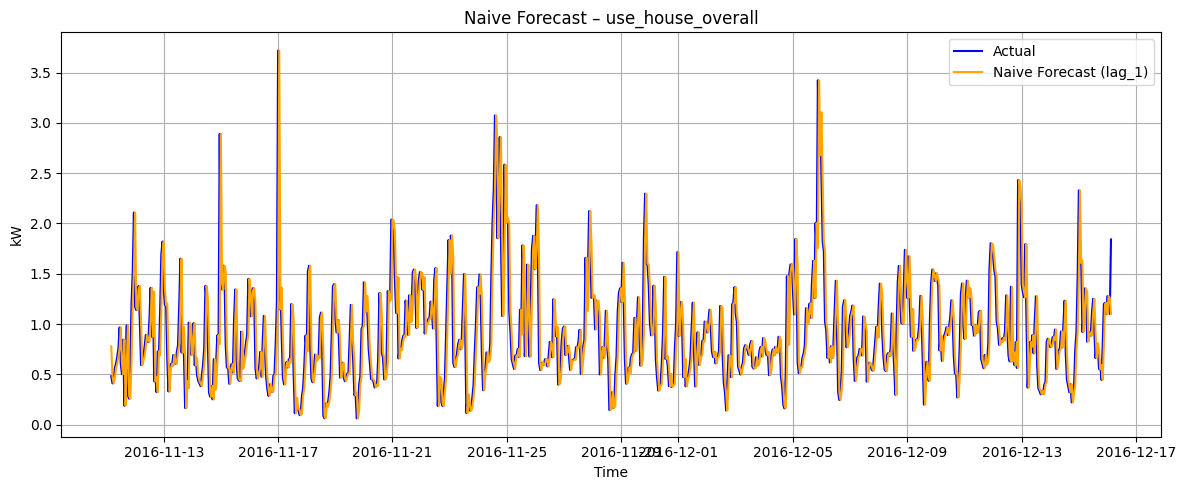

In [6]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(actual, label="Actual", color="blue")
plt.plot(predicted, label="Naive Forecast (lag_1)", color="orange")
plt.title(f"Naive Forecast – {TARGET_COL}")
plt.xlabel("Time")
plt.ylabel("kW")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()